<a href="https://colab.research.google.com/github/putraadityapriyono37/Diabetes-Prediction-AI/blob/main/Diabetes_Prediction_CLEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Eksperimen Sederhana**

Langkah 1: Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head() # Tampilkan 5 baris pertama

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Langkah 2: Processing Data

Dataset ini memiliki kolom kategorikal (gender) yang perlu di-encode:

In [2]:
# Periksa nilai unik di kolom 'gender'
df['gender'].unique()  # Output: array(['Male', 'Female', 'No Info'], dtype=object)

# Manual Mapping (jika tahu pasti kategori)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'No Info': 2})

# Periksa missing values
df.isnull().sum()

# Hapus baris dengan missing values
df = df.dropna()

Langkah 3: Split Data dan Latih Model

Gunakan Regresi Logistik untuk prediksi diabetes:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Muat dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# 2. Encode kolom kategorikal
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
df['smoking_history'] = df['smoking_history'].map({
    'never': 0,
    'former': 1,
    'current': 2,
    'not current': 3,
    'ever': 4,
    'No Info': 5
})

# 3. Handle missing values (isi dengan mean untuk kolom numerik)
df = df.fillna(df.mean(numeric_only=True))

# 4. Pastikan kolom target 'diabetes' tidak kosong
df = df[df['diabetes'].notnull()]

# 5. Pisahkan fitur dan target
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# 6. Validasi data (pastikan tidak kosong)
if len(X) == 0 or len(y) == 0:
    raise ValueError("Data kosong setelah preprocessing!")

# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Latih model
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# 9. Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.9591

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.87      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



Langkah 4: Visualisasi Hasil

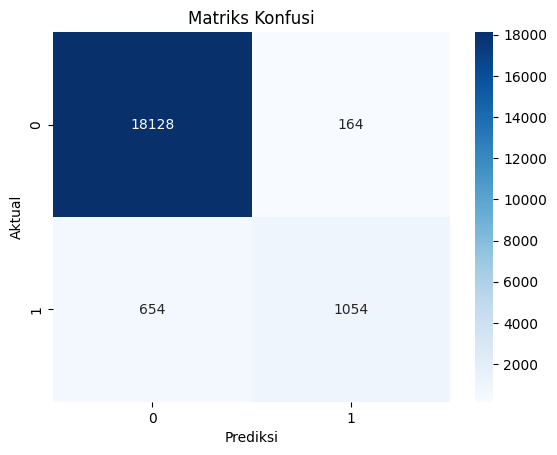

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriks Konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriks Konfusi")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

**2. Modifikasi Model**

a. Coba Algoritma Lain (Random Forest atau XGBoost)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Akurasi XGBoost:", accuracy_score(y_test, y_pred_xgb))

Akurasi Random Forest: 0.97035
Akurasi XGBoost: 0.971


b. Feature Importance Analysis dengan SHAP

<Figure size 640x480 with 0 Axes>

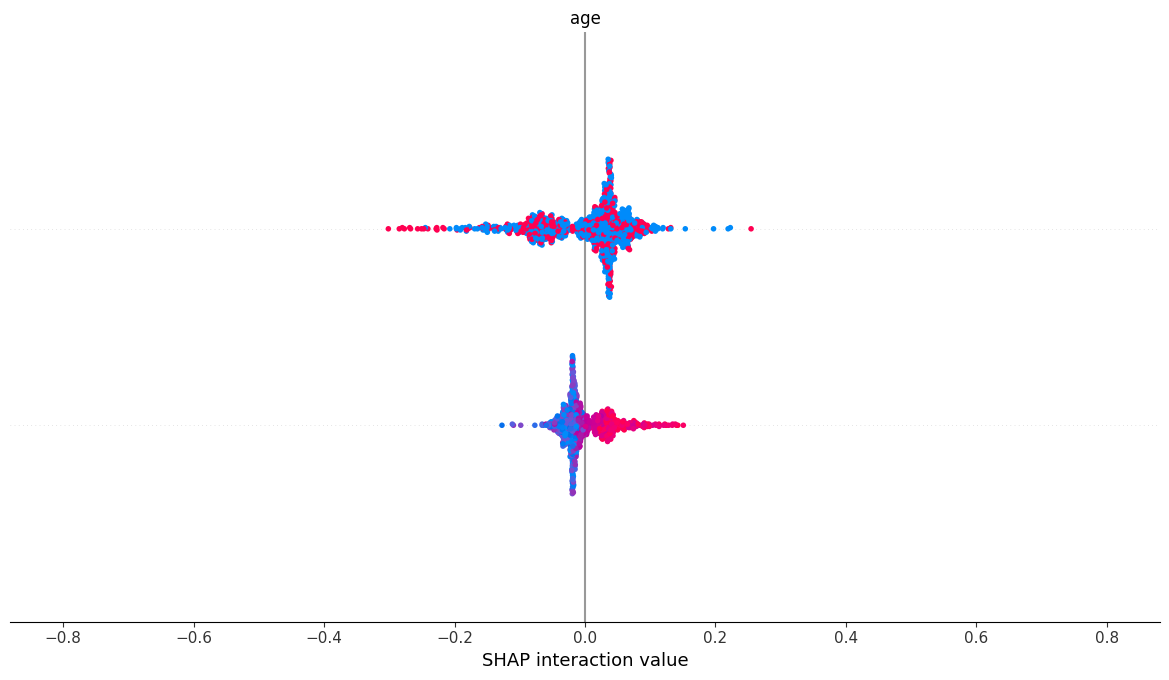

In [6]:
import shap

# Gunakan 1.000 sampel acak dari X_test
X_test_sample = shap.utils.sample(X_test, 1000)

# Hitung SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_sample)

# Visualisasi
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

c. Hyperparameter Tuning dengan GridSearchCV

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Pipeline dengan standarisasi dan model
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='lbfgs', max_iter=1000)  # Tambah max_iter
)

# 2. Parameter grid (hanya l2 untuk lbfgs)
param_grid = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__penalty': ['l2'],  # Hanya l2
    'logisticregression__solver': ['lbfgs']
}

# 3. GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# 4. Hasil terbaik
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best Score: 0.9606875


d. Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score

# Validasi silang untuk Logistic Regression
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9603100000000001


**3. Analisis Hasil**

a. Evaluasi Model yang Lebih Mendalam

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.87      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

ROC-AUC Score: 0.9614730444862447


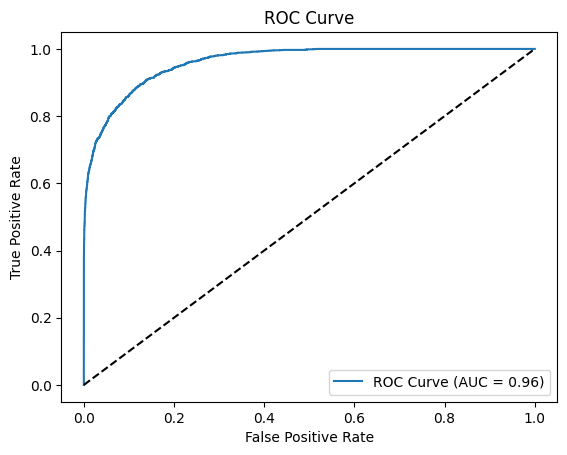

In [9]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

b. Analisis Data dengan Visualisasi


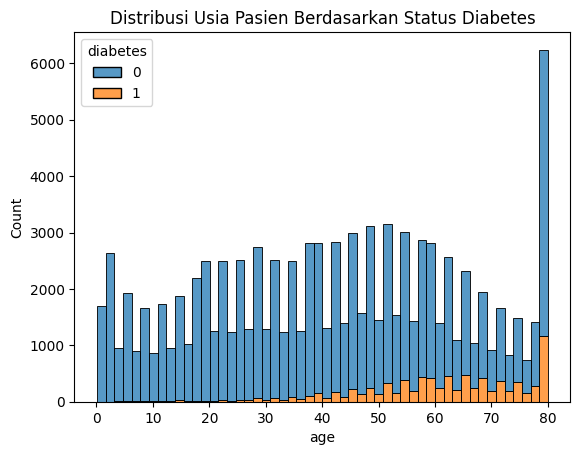

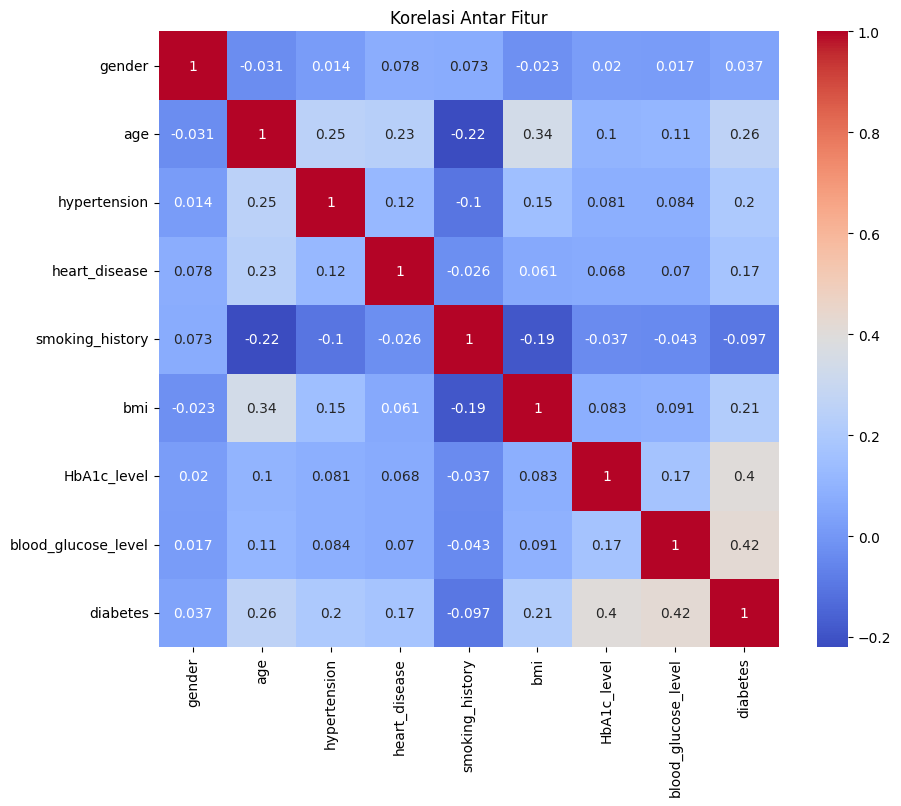

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi usia pasien berdasarkan status diabetes
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack')
plt.title('Distribusi Usia Pasien Berdasarkan Status Diabetes')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

**4. Demo Interaktif (Setelah Modifikasi dan Analisis)**


In [12]:
from ipywidgets import interact, widgets
import pandas as pd

# Asumsikan X_train dan model sudah didefinisikan di Colab
# Pastikan Anda sudah menjalankan training sebelumnya sebelum demo

def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c, blood_glucose):
    # Encode kategorikal
    gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
    smoke_map = {'never': 0, 'former': 1, 'current': 2, 'not current': 3, 'ever': 4, 'No Info': 5}
    data = {
        'gender': gender_map[gender],
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'smoking_history': smoke_map[smoking_history],
        'bmi': bmi,
        'HbA1c_level': hba1c,
        'blood_glucose_level': blood_glucose
    }
    df_input = pd.DataFrame([data])[X_train.columns]  # sesuaikan urutan kolom
    pred = model.predict(df_input)[0]
    print(f"Prediksi: {'Diabetes' if pred==1 else 'Tidak Diabetes'}")

# Interaktif dengan widget yang mudah diisi
interact(
    predict_diabetes,
    gender=widgets.Dropdown(options=["Female","Male","Other"], description='Gender:'),
    age=widgets.IntText(value=30, description='Usia:'),
    hypertension=widgets.Dropdown(options=[0,1], description='Hipertensi:'),
    heart_disease=widgets.Dropdown(options=[0,1], description='Penyakit Jantung:'),
    smoking_history=widgets.Dropdown(
        options=["never","former","current","not current","ever","No Info"],
        description='Merokok:'
    ),
    bmi=widgets.FloatText(value=22.0, description='BMI:'),
    hba1c=widgets.FloatText(value=5.4, description='HbA1c:'),
    blood_glucose=widgets.IntText(value=90, description='Glukosa:')
)


interactive(children=(Dropdown(description='Gender:', options=('Female', 'Male', 'Other'), value='Female'), In…

<function __main__.predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c, blood_glucose)>